**Importing Libraries**

In [74]:
import pandas as pd
import os
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
os.chdir('D:\\NCSA\\CPRHD')

**Removing "Margin of Error" based columns from every year data as those need not to be considered in modelling**

In [17]:
temp = []
for each in os.listdir('year'):
    df = pd.read_csv(each, low_memory = False)
    for cols in list(df.columns):
        if "Margin of Error" in cols:
            temp.append(cols)
    df.drop(columns = temp, axis = 1, inplace=True)
    temp.clear()
    df.to_csv(each)

**Loading each data separately for removing some columns and comparing each data file with another one to see if they all have consistent columns or not**

In [36]:
data2010 = pd.read_csv('newYears//2010 combined.csv', low_memory = False)
data2011 = pd.read_csv('newYears//2011 combined.csv', low_memory = False)
data2012 = pd.read_csv('newYears//2012 combined.csv', low_memory = False)
data2013 = pd.read_csv('newYears//2013 combined.csv', low_memory = False)
data2014 = pd.read_csv('newYears//2014 combined.csv', low_memory = False)
data2015 = pd.read_csv('newYears//2015 combined.csv', low_memory = False)
data2016 = pd.read_csv('newYears//2016 combined.csv', low_memory = False)
data2017 = pd.read_csv('newYears//2017 combined.csv', low_memory = False)

### Cleaning Process begins

In [163]:
matching = []
result = []
for c in list(data2017.columns):
    if ("income" in c or "Income" in c or "INCOME" in c) and ('2017' in c):
        matching.append(c)
        res = re.sub(r'[\(].*?[\)]\s', '', c)
        result.append(res)

In [164]:
data2017.rename(columns={x:y for x,y in zip(matching, result)}, inplace=True)

In [168]:
data2017.shape

(1535, 733)

In [133]:
data2012.shape

(1535, 733)

**Checking for consistency of each columns in different data files**

In [167]:
for x,y in zip(list(data2010.columns), list(data2017.columns)):
    if x!=y:
        print('data2010: ' + x);print('data2017: ' + y);print('\n')
    else:
        pass

**Assigning same name to each column to maintain the uniformity throughout the data**

In [166]:
a = list(data2017.columns)
b = list(data2010.columns)
data2017.rename(columns={x:y for x,y in zip(a,b)}, inplace=True)

In [93]:
data2010.to_csv("2010 combined.csv")
data2011.to_csv("2011 combined.csv")
data2012.to_csv("2012 combined.csv")
data2013.to_csv("2013 combined.csv")
data2017.to_csv("2017 combined.csv", index = False)

In [225]:
# Estimate; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population (6)

# estimate ; under 18 years
# and 16 years one cases

In [235]:
os.listdir('newYears')

['2010 combined.csv',
 '2011 combined.csv',
 '2012 combined.csv',
 '2013 combined.csv',
 '2014 combined.csv',
 '2015 combined.csv',
 '2016 combined.csv',
 '2017 combined.csv']

In [87]:
data2017['Year'] = 2017
data2017.to_csv("newYears//2017 combined.csv", index = False)

**Combining all the data**

In [88]:
all_filename = [i for i in os.listdir('newYears')]
combined_data = pd.concat([pd.read_csv('newYears\\'+f) for f in all_filename])

In [89]:
combined_data.to_csv('final_data.csv', index = False)

In [90]:
combine = pd.read_csv('final_data.csv', low_memory = False)

In [91]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12280 entries, 0 to 12279
Columns: 687 entries, Id to Year
dtypes: int64(326), object(361)
memory usage: 64.4+ MB


In [92]:
objcols = combine.columns.drop(['Id', 'Geography', 'Geography_x', 'Geography_y'])

combine[objcols] = combine[objcols].apply(pd.to_numeric, errors='coerce')

**Checking for NaN values in combined data**

In [93]:
percent_missing_df = pd.DataFrame(combine.isna().sum(), columns=['Total NaN'])
percent_missing_df["Percentage of NaN"] = ((percent_missing_df['Total NaN'])/(combine.shape[0])*100)

In [94]:
percent_missing_df[(percent_missing_df['Percentage of NaN']==25)]

,Total NaN,Percentage of NaN
Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population,3070,25.0
Percent; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population,3070,25.0
Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population - With health insurance coverage,3070,25.0
Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population - With health insurance coverage - With private health insurance,3070,25.0
Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population - With health insurance coverage - With public coverage,3070,25.0
Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population - No health insurance coverage,3070,25.0
Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population under 18 years,3070,25.0
Percent; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population under 18 years,3070,25.0
Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population under 18 years - No health insurance coverage,3070,25.0
Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population 18 to 64 years,3070,25.0


In [95]:
test1 = combine[['Year', 'Geography', 'Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population']]

In [103]:
test1.sort_values(by='Geography')

,Year,Geography,Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population
146,2010,"Census Tract 1001, Cook County, Illinois",NaN
1681,2011,"Census Tract 1001, Cook County, Illinois",NaN
3216,2012,"Census Tract 1001, Cook County, Illinois",5960.0
6286,2014,"Census Tract 1001, Cook County, Illinois",5666.0
7821,2015,"Census Tract 1001, Cook County, Illinois",5285.0
10891,2017,"Census Tract 1001, Cook County, Illinois",5498.0
4751,2013,"Census Tract 1001, Cook County, Illinois",5989.0
9356,2016,"Census Tract 1001, Cook County, Illinois",5095.0
3217,2012,"Census Tract 1002, Cook County, Illinois",7011.0
6287,2014,"Census Tract 1002, Cook County, Illinois",6422.0


In [139]:
test11 = test1[(test1['Geography'] == 'Census Tract 1001, Cook County, Illinois') | (test1['Geography'] == 'Census Tract 1002, Cook County, Illinois') | (test1['Geography'] == 'Census Tract 1003, Cook County, Illinois')]

In [68]:
test1.groupby(['Geography'])['Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population']

In [140]:
test11

,Year,Geography,Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population
146,2010,"Census Tract 1001, Cook County, Illinois",NaN
147,2010,"Census Tract 1002, Cook County, Illinois",NaN
148,2010,"Census Tract 1003, Cook County, Illinois",NaN
1681,2011,"Census Tract 1001, Cook County, Illinois",NaN
1682,2011,"Census Tract 1002, Cook County, Illinois",NaN
1683,2011,"Census Tract 1003, Cook County, Illinois",NaN
3216,2012,"Census Tract 1001, Cook County, Illinois",5960.0
3217,2012,"Census Tract 1002, Cook County, Illinois",7011.0
3218,2012,"Census Tract 1003, Cook County, Illinois",5714.0
4751,2013,"Census Tract 1001, Cook County, Illinois",5989.0


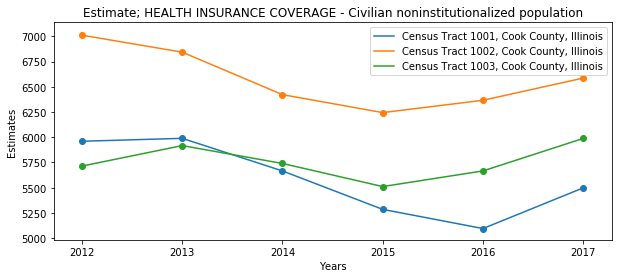

In [142]:
# plt.figure(figsize=(14,8))
fig, ax = plt.subplots(figsize=(10,4))
for key, grp in test11.groupby(['Geography']):
    ax.plot(grp['Year'], grp['Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population'], label = key)
    ax.scatter(grp['Year'], grp['Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population'])
ax.legend()
plt.xlabel('Years')
plt.ylabel('Estimates')
plt.title('Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population')
plt.show()

In [145]:
test11.sort_values(by='Geography').head(8)

,Year,Geography,Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population
146,2010,"Census Tract 1001, Cook County, Illinois",NaN
9356,2016,"Census Tract 1001, Cook County, Illinois",5095.0
10891,2017,"Census Tract 1001, Cook County, Illinois",5498.0
1681,2011,"Census Tract 1001, Cook County, Illinois",NaN
6286,2014,"Census Tract 1001, Cook County, Illinois",5666.0
3216,2012,"Census Tract 1001, Cook County, Illinois",5960.0
7821,2015,"Census Tract 1001, Cook County, Illinois",5285.0
4751,2013,"Census Tract 1001, Cook County, Illinois",5989.0


In [162]:
from scipy import interpolate

x = [2012, 2013, 2014, 2015, 2016, 2017]
y = [5960, 5989, 5666, 5285, 5095, 5498]
f = interpolate.interp1d(x, y, fill_value = "extrapolate")
print(f(2010))

5902.0


In [158]:
from scipy.optimize import curve_fit

def exponential_fit(x, a, b, c):
    return a*np.exp(-b*x) + c

if __name__ == "__main__":
    x = np.array([2012, 2013, 2014, 2015, 2016, 2017])
    y = np.array([5960, 5989, 5666, 5285, 5095, 5498])
    fitting_parameters, covariance = curve_fit(exponential_fit, x, y)
    a, b, c = fitting_parameters

In [160]:
next_y = exponential_fit(2011, a, b, c)

In [159]:
fitting_parameters

array([1.00000000e+00, 1.00000000e+00, 5.58216667e+03])

In [161]:
next_y

5582.166666666667

In [69]:
test1.groupby('Geography')['Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population'].plot()

Geography
Census Tract 1001, Cook County, Illinois         AxesSubplot(0.125,0.11;0.775x0.77)
Census Tract 1002, Cook County, Illinois         AxesSubplot(0.125,0.11;0.775x0.77)
Census Tract 1003, Cook County, Illinois         AxesSubplot(0.125,0.11;0.775x0.77)
Census Tract 1004, Cook County, Illinois         AxesSubplot(0.125,0.11;0.775x0.77)
Census Tract 1005, Cook County, Illinois         AxesSubplot(0.125,0.11;0.775x0.77)
Census Tract 1006, Cook County, Illinois         AxesSubplot(0.125,0.11;0.775x0.77)
Census Tract 1007, Cook County, Illinois         AxesSubplot(0.125,0.11;0.775x0.77)
Census Tract 101, Cook County, Illinois          AxesSubplot(0.125,0.11;0.775x0.77)
Census Tract 102.01, Cook County, Illinois       AxesSubplot(0.125,0.11;0.775x0.77)
Census Tract 102.02, Cook County, Illinois       AxesSubplot(0.125,0.11;0.775x0.77)
Census Tract 103, Cook County, Illinois          AxesSubplot(0.125,0.11;0.775x0.77)
Census Tract 104, Cook County, Illinois          AxesSubplot(0.125

In [50]:
testobjcols = data2017.columns.drop(['Id', 'Geography', 'Geography_x', 'Geography_y'])

data2017[testobjcols] = data2017[testobjcols].apply(pd.to_numeric, errors='coerce')

In [51]:
missing_df_2017 = pd.DataFrame(data2017.isna().sum(), columns=['Total NaN'])
missing_df_2017["Percentage of NaN"] = ((missing_df_2017['Total NaN'])/(data2017.shape[0])*100)

In [53]:
missing_df_2017[(missing_df_2017['Percentage of NaN']==100)]

,Total NaN,Percentage of NaN


In [205]:
combine.drop(columns = list(dropper.index), axis = 1, inplace = True)

In [206]:
combine.shape

(12280, 686)

In [40]:
data2010 = data2010.T.drop_duplicates(keep='first')

In [30]:
data2010.T[data2010.T.duplicated()]

,0,1,2,3,4,5,6,7,8,9,...,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534
Percent; SEX AND AGE - Total population,5303,5924,2981,6475,4651,4138,3294,1778,6563,3734,...,3903,2855,5474,3216,2620,4657,4138,3984,3774,3886
Percent Margin of Error; SEX AND AGE - Female,4.9,4.9,4.6,3.5,5.2,3.9,8.7,7.6,3.8,4.4,...,3.5,4.4,2.9,4.5,5.2,3.2,5.4,5.0,7.7,4.0
Percent; SEX AND AGE - Median age (years),(X),(X),(X),(X),(X),(X),(X),(X),(X),(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
Percent Margin of Error; SEX AND AGE - Median age (years),(X),(X),(X),(X),(X),(X),(X),(X),(X),(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
Estimate; SEX AND AGE - 18 years and over.1,3724,4283,2289,5222,4156,3394,2985,1690,5299,2896,...,2510,1994,3952,2233,1840,3291,2946,3153,2829,3066
Estimate Margin of Error; SEX AND AGE - 18 years and over.1,455,505,349,547,534,296,482,401,505,301,...,131,144,262,213,127,236,327,300,259,494
Percent; SEX AND AGE - 18 years and over.1,3724,4283,2289,5222,4156,3394,2985,1690,5299,2896,...,2510,1994,3952,2233,1840,3291,2946,3153,2829,3066
Percent Margin of Error; SEX AND AGE - 18 years and over.1,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
Percent Margin of Error; SEX AND AGE - Female.1,5.5,5.2,4.8,4.0,5.4,3.7,9.3,7.5,3.9,4.9,...,3.5,3.2,2.9,4.5,3.6,2.9,3.6,5.7,6.3,4.2
Estimate; SEX AND AGE - 65 years and over.1,352,349,339,1112,325,322,168,422,482,194,...,97,224,356,79,292,415,214,615,401,435


In [45]:
data2011 = data2011.T.drop_duplicates(keep='first').T